# Анализ доходов жителей США

## Подготовка к выполнению

1. Импорт необходимых библиотек

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Выполнение заданий

### Описание данных


***Источник данных:*** [данные о доходах взрослого населения США](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

***Набор данных включает в себя информацию о демографических характеристиках(возраст, пол, раса), образовании, занятости и доходе.***

In [307]:
data_path = './adult.csv'
data = pd.read_csv(data_path)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [308]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Фильтрация

#### Фильтрация по одному условию

In [310]:
bachelors = data[data['education'] == 'Bachelors']
bachelors.shape

(8025, 15)

В данных 8025 человек, которые имеют степень образования 'Бакалавр'.

#### Фильтрация по нескольким условиям

In [311]:
black_women = data[(data['race'] == 'Black') & (data['gender'] == 'Female') & (data['education'] == 'Bachelors') & (
        data['income'] == '>50K')]
black_women.shape

(40, 15)

В данных 40 женщин афроамериканского происхождения, которые имеют бакалаврскую степень образования и заработок более 50 тысяч в год.

### Сортировка

#### Сортировка по возрастанию

In [312]:
ascending_sort = data.sort_values(by='hours-per-week')
ascending_sort['hours-per-week'].iloc[0]

np.int64(1)

В данных наименьшее число часов работы в неделю составляет 1 час. 

#### Сортировка по убыванию

In [313]:
descending_sort = data.sort_values(by='age', ascending=False)
descending_sort['age'].iloc[0]

np.int64(90)

Возраст самого старого человека, представленного в данных составляет 90 лет.

### Частотная таблица

In [314]:
education_counts = data['education'].value_counts()
education_counts

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Частотная таблица показывает, что самое часто встречающееся образование среди опрошенных - выпускник старшей школы "HS-grad"

### Гистограмма

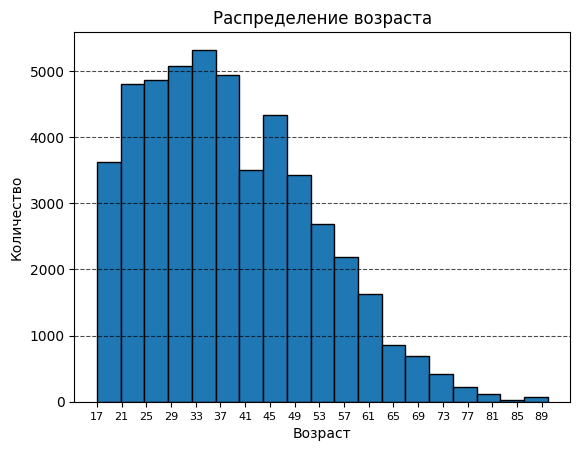

In [315]:
plt.hist(data['age'], bins=19, edgecolor='black')
plt.xlabel('Возраст')

plt.ylabel('Количество')
plt.title('Распределение возраста')
xticks = [i for i in range(17, 90, 4)]
plt.xticks(xticks, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='black')
# plt.grid(axis='x', linestyle='--', alpha=0.7, color='black')
plt.show()

### Столбчатая диаграмма

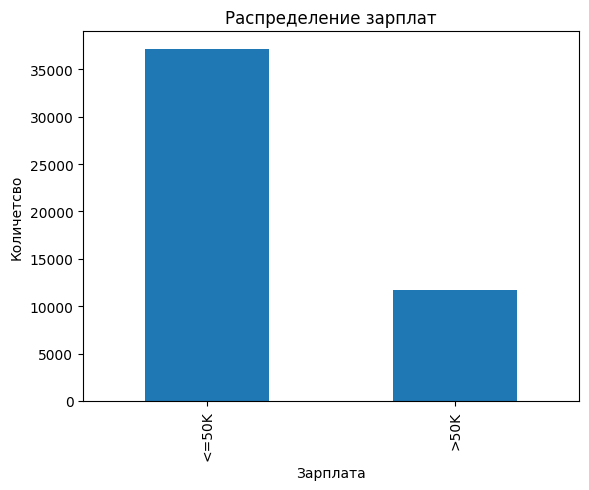

In [316]:
data['income'].value_counts().plot(kind='bar')
plt.xlabel('Зарплата')
plt.ylabel('Количетсво')
plt.title('Распределение зарплат')
plt.show()

### Круговая диаграмма

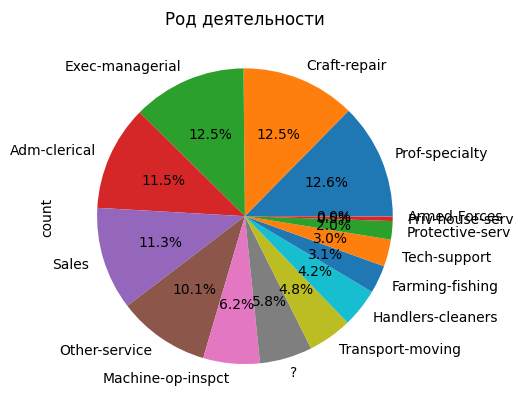

In [317]:
data['occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Род деятельности')
plt.show()

### Создание новых признаков

#### Создание нового признака с помощью анонимной функции

In [318]:
data['foreigners'] = data['native-country'].apply(lambda x: 'Native' if x == 'United-States' else 'Foreigner')

#### Создание нового признака с помощью def

In [319]:
def categorize_education(education):
    if education in ['Bachelors', 'Masters', 'Doctorate']:
        return 'Higher education'
    else:
        return 'Other'


data['education-category'] = data['education'].apply(categorize_education)
data['education-category'].value_counts()

education-category
Other               37566
Higher education    11276
Name: count, dtype: int64

### Группировки

#### Группировка один столбец группировки/один столбец агрегирования/один метод агрегирования

In [320]:
average_age_by_gender = data.groupby('gender')['age'].mean()
average_age_by_gender

gender
Female    36.927989
Male      39.494395
Name: age, dtype: float64

#### Группировка один столбец группировки/несколько столбцов агрерирования/один метод агрегирования

In [321]:
group_by_education = data.groupby('education')[['age', 'hours-per-week']].mean()
group_by_education

,age,hours-per-week
education,,
10th,37.902808,36.986321
11th,32.141832,33.952539
12th,32.235921,35.374429
1st-4th,46.639676,38.761134
5th-6th,43.585462,38.923379
7th-8th,49.525654,39.003141
9th,40.902116,38.359788
Assoc-acdm,37.777014,40.809494
Assoc-voc,38.651140,41.658418


#### Группировка один столбец группировки/один столбец агрегирования/несколько методов агрегирования

In [322]:
data.groupby('education')['age'].agg(['min', 'max'])

,min,max
education,,
10th,17,90
11th,17,90
12th,17,81
1st-4th,19,90
5th-6th,17,84
7th-8th,17,90
9th,17,90
Assoc-acdm,19,90
Assoc-voc,19,84


#### Группировка один столбец группировки/несколько столбцов агрегирования/несколько методов агрегирования

In [323]:
data.groupby('workclass').agg({'age': ['mean'], 'hours-per-week': ['mean', 'median']})

age hours-per-week       
                       mean           mean median
workclass                                        
?                 40.141122      31.812433   36.0
Federal-gov       42.577514      41.513268   40.0
Local-gov         41.676020      40.847258   40.0
Never-worked      19.900000      28.900000   35.0
Private           36.903144      40.273137   40.0
Self-emp-inc      45.799410      48.570501   50.0
Self-emp-not-inc  45.332470      44.395132   40.0
State-gov         39.512367      39.090863   40.0
Without-pay       47.285714      33.952381   40.0

## 3 Этап

### 1. Описательные характеристики

#### Числовой признак

In [324]:
hours_per_week = data['hours-per-week']

##### Среднее

In [325]:
mean_hours_per_week = hours_per_week.mean()
mean_hours_per_week

np.float64(40.422382375824085)

Среднее арифметическое количества рабочих часов в неделю составляет 40

##### Медиана

In [326]:
median_hours_per_week = hours_per_week.median()
median_hours_per_week

np.float64(40.0)

##### Мода

In [327]:
mode_hours_per_week = hours_per_week.mode()[0]
mode_hours_per_week

np.int64(40)

Самое частое значение рабочих часов в неделю составляет 40

##### Размах

In [328]:
range_hours_per_week = hours_per_week.max() - hours_per_week.min()
range_hours_per_week

np.int64(98)

Амплитуда изменения количества рабочих часов в неделю равна 98 

##### Квартильные значения

###### Первый квартиль

In [329]:
q1_hours_per_week = hours_per_week.quantile(0.25)
q1_hours_per_week

np.float64(40.0)

25% работает меньше 40 часов в неделю
75% работает больше 40 часов в неделю

###### Третий квартиль

In [330]:
q3_hours_per_week = hours_per_week.quantile(0.75)
q3_hours_per_week

np.float64(45.0)

75% опрошенных работают меньше 45 часов в неделю
25% процентов опрошенных работают больше 45 часов в неделю

##### Межквартильный размах

In [331]:
iqr_hours_per_week = q3_hours_per_week - q1_hours_per_week
iqr_hours_per_week

np.float64(5.0)

50% наблюдений между первым и третьим квартилем находятся в диапазоне 5 часов

##### Дисперсия

In [332]:
variance_hours_per_week = hours_per_week.var()
variance_hours_per_week

np.float64(153.5478850061782)

Средний квадрат отклонения составляет 154 часа

##### Стандартное отклонение

In [333]:
std_hours_per_week = hours_per_week.std()
std_hours_per_week

np.float64(12.391444024252307)

В среднем количество рабочих часов в неделю от среднего количества отклоняется на 12 часов

Количество рабочих часов в неделю представляет собой симметричное распределение

#### Категориальный признак

In [334]:
occupation = data['occupation']

#### Мода

In [335]:
mode_occupation = occupation.mode()[0]
mode_occupation

'Prof-specialty'

##### Количество уникальных значений

In [336]:
unique_occupation = occupation.nunique()
unique_occupation

15

В данных приведено всего 15 различных профессий

### 2. Построение ящика с усами

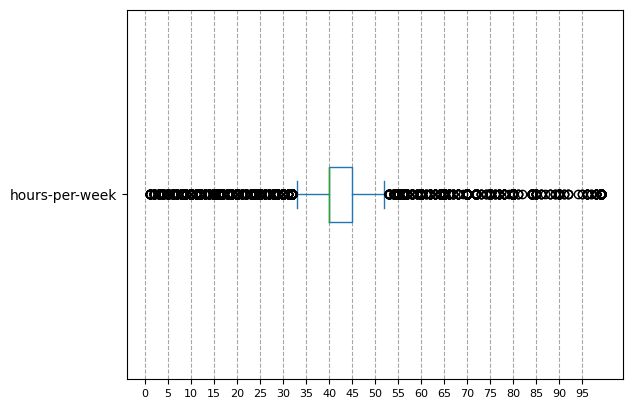

In [380]:
hours_per_week.plot(kind='box', vert=False)
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
xticks = [i for i in range(0, 100, 5)]
plt.xticks(xticks, fontsize=8)
plt.show()

Медиана (второй квартиль) равна 40 и совпадает со значением первого квартиля.

Значение третьего квартиля равно 45.

Межквартильный размах составляет 5.

Минимальное значение равно 33, а максимальное - 52.

Остальное - выбросы.

Таким образом, действительные значения находятся в диапазоне от 33 до 52.

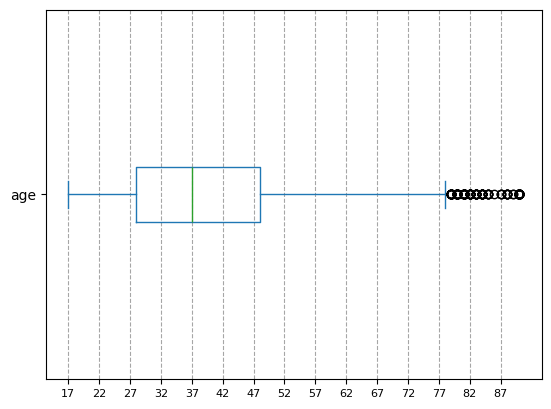

In [382]:
age = data['age']
age.plot(kind='box', vert=False)
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')
xticks = [i for i in range(17, 90, 5)]
plt.xticks(xticks, fontsize=8)
plt.show()


Медиана (второй квартиль) равна 37.

Значения между первым и третьим квартилем - от до 28 до 48, т.е. межквартильный размах равен 20.

Минимальное значение - 17.

Максимальное значение - 78.

Выбросы - все значения больше 78.

### 3. Удаление выбросов

#### Целевая переменная

In [339]:
low1 = q1_hours_per_week - iqr_hours_per_week * 1.5
up1 = q3_hours_per_week + iqr_hours_per_week * 1.5
cleaned_data = data[(data['hours-per-week'] >= low1) & (data['hours-per-week'] <= up1)]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35346 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 35346 non-null  int64 
 1   workclass           35346 non-null  object
 2   fnlwgt              35346 non-null  int64 
 3   education           35346 non-null  object
 4   educational-num     35346 non-null  int64 
 5   marital-status      35346 non-null  object
 6   occupation          35346 non-null  object
 7   relationship        35346 non-null  object
 8   race                35346 non-null  object
 9   gender              35346 non-null  object
 10  capital-gain        35346 non-null  int64 
 11  capital-loss        35346 non-null  int64 
 12  hours-per-week      35346 non-null  int64 
 13  native-country      35346 non-null  object
 14  income              35346 non-null  object
 15  foreigners          35346 non-null  object
 16  education-category  35346 n

#### Предиктор

In [340]:
mean_age = cleaned_data['age'].mean()
std_age = cleaned_data['age'].std()
mean_age, std_age

(np.float64(38.88142929893057), np.float64(12.447700828325518))

In [341]:
low2 = mean_age - 3 * std_age
up2 = mean_age + 3 * std_age
low2, up2

(np.float64(1.538326813954015), np.float64(76.22453178390712))

In [342]:
cleaned_data = cleaned_data[(cleaned_data['age'] >= low2) & (cleaned_data['age'] <= up2)]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35236 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 35236 non-null  int64 
 1   workclass           35236 non-null  object
 2   fnlwgt              35236 non-null  int64 
 3   education           35236 non-null  object
 4   educational-num     35236 non-null  int64 
 5   marital-status      35236 non-null  object
 6   occupation          35236 non-null  object
 7   relationship        35236 non-null  object
 8   race                35236 non-null  object
 9   gender              35236 non-null  object
 10  capital-gain        35236 non-null  int64 
 11  capital-loss        35236 non-null  int64 
 12  hours-per-week      35236 non-null  int64 
 13  native-country      35236 non-null  object
 14  income              35236 non-null  object
 15  foreigners          35236 non-null  object
 16  education-category  35236 n

### 4. Обработка пропусков в данных

In [365]:
empt_hours = cleaned_data['hours-per-week'].isnull().sum()
empt_age = cleaned_data['age'].isnull().sum()
empt_hours, empt_age

(np.int64(0), np.int64(0))

В данных нет пропусков, но если бы они были, то можно было бы заменить пропущенные значения таким образом

In [343]:
cleaned_data.fillna({'col': median_hours_per_week}, inplace=True)

### 5. Построение корреляционной матрицы

In [358]:
corr_matr = cleaned_data.corr(numeric_only=True)
corr_matr.style.background_gradient()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.078606,0.013319,0.079964,0.055608,0.053875
fnlwgt,-0.078606,1.000000,-0.047137,-0.006582,-0.004678,-0.011380
educational-num,0.013319,-0.047137,1.000000,0.110279,0.076475,0.145782
capital-gain,0.079964,-0.006582,0.110279,1.000000,-0.032059,0.060253
capital-loss,0.055608,-0.004678,0.076475,-0.032059,1.000000,0.040732
hours-per-week,0.053875,-0.011380,0.145782,0.060253,0.040732,1.000000


### 6. Корреляция между признаками с самой сильной линейной взаимосвязью

In [347]:
cleaned_data['hours-per-week'].corr(cleaned_data['educational-num'])

np.float64(0.14578157476718612)

### 7. Построение графика рассеяния с самой сильной корреляцией

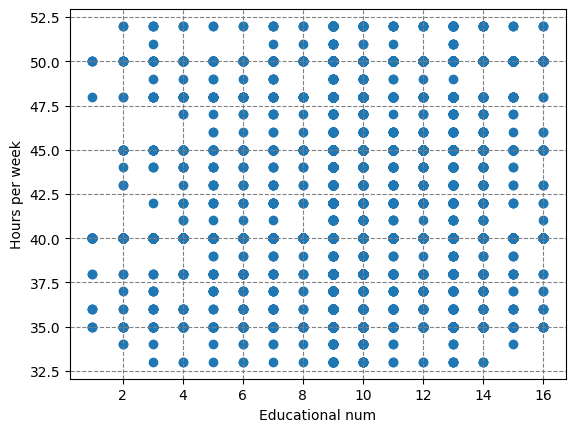

In [354]:
plt.scatter(cleaned_data['educational-num'], cleaned_data['hours-per-week'])
plt.xlabel('Educational num')
plt.ylabel('Hours per week')
plt.grid(axis='x', linestyle='--', color='gray')
plt.grid(axis='y', linestyle='--', color='gray')
plt.show()

### 8. Модель линейной регрессии

#### Построение модели

In [363]:
X = sm.add_constant(cleaned_data['educational-num'])
Y = cleaned_data['hours-per-week']
model = sm.OLS(Y, X).fit()
p = model.params
p

const              39.227647
educational-num     0.231378
dtype: float64

Если educational-num = 0, то количество рабочих часов в неделю будет составлять 39.23.

При увеличении educational-num на 1, количество рабочих часов увеличится на 0.23

#### Коэффициент детерминации

In [366]:
model.rsquared

np.float64(0.021252267541600922)

У модели плохое качество

#### Среднеквадратичная ошибка

In [361]:
Y_pr = model.predict(X)
MSE = sum((Y - Y_pr) ** 2) / len(Y)
MSE

15.813285042914284

Модель ошибается, cреднеквадратичная ошибка составляет 15.

#### Среднеабсолютная ошибка

In [362]:
Y_pr = model.predict(X)
MAE = sum(abs(Y - Y_pr)) / len(Y)
MAE

3.039569666258207

Модель ошибается, следует сравнить с другими моделями, чтобы сделать содержательные выводы. Среднеабсолютная ошибка составляет 3